<a href="https://colab.research.google.com/github/tanvi1911/Basic_Linear_Regression_on_Placement_Data/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
github_csv_url = "https://github.com/campusx-official/100-days-of-machine-learning/raw/main/day48-simple-linear-regression/placement.csv"

In [3]:
df = pd.read_csv(github_csv_url)

In [4]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package(in lpa)')

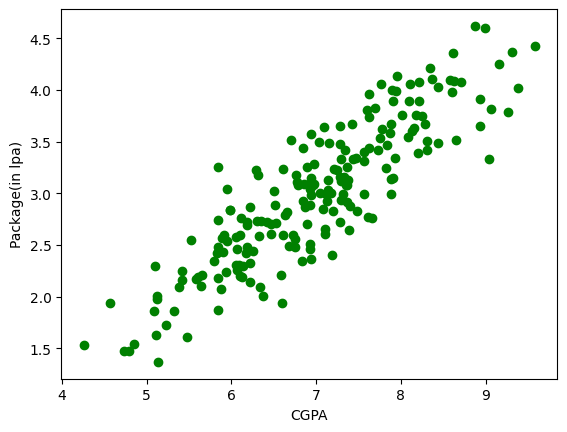

In [5]:
plt.scatter(df['cgpa'], df['package'], c = 'green')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

The basic syntax of the `iloc` function is as follows:

```
df.iloc[row_indexer, column_indexer]
```



In [6]:
X = df.iloc[:,0:1]
print(X)

     cgpa
0    6.89
1    5.12
2    7.82
3    7.42
4    6.94
..    ...
195  6.93
196  5.89
197  7.21
198  7.63
199  6.22

[200 rows x 1 columns]


In [7]:
y = df.iloc[:,-1]
print(y)

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr = LinearRegression()

In [11]:
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
X_test

,cgpa
95,6.63
15,7.25
30,7.36
158,5.95
128,7.93
115,8.35
69,7.30
170,6.22
174,7.32
45,7.87


In [13]:
y_test

95     2.79
15     3.23
30     3.26
158    3.04
128    3.34
115    4.21
69     2.94
170    2.87
174    2.99
45     3.58
66     1.63
182    2.08
165    4.08
78     2.21
186    3.47
177    3.64
56     2.74
152    3.08
82     2.17
68     2.99
124    2.31
16     2.35
148    3.40
93     3.08
65     3.81
60     2.19
84     1.53
67     2.89
125    3.16
132    2.48
9      3.51
18     2.98
55     3.39
75     3.28
150    2.73
104    3.74
135    2.60
137    3.13
164    3.82
76     3.15
Name: package, dtype: float64

In [14]:
lr.predict(X_test.iloc[4].values.reshape(1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.52684689])

In [15]:
m = lr.coef_
m

array([0.57425647])

In [16]:
b = lr.intercept_
b

-1.0270069374542108

In [17]:
#linear regression equation
# y = mx + b
# package = (slope)(cgpa) + intercept
# Here m tells us the weightage of the cgpa over the package
# b is the off-set

m * 6.63 + b

array([2.78031348])

Text(0, 0.5, 'Package(in LPA)')

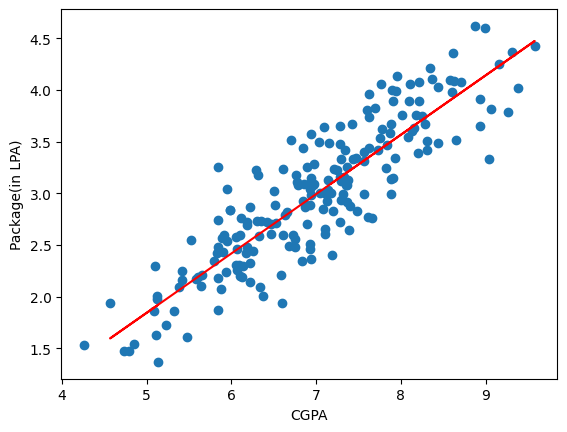

In [18]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train, lr.predict(X_train), c = 'red')
plt.xlabel('CGPA')
plt.ylabel('Package(in LPA)')

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [21]:
y_pred = lr.predict(X_test)

In [22]:
y_test.values

array([2.79, 3.23, 3.26, 3.04, 3.34, 4.21, 2.94, 2.87, 2.99, 3.58, 1.63,
       2.08, 4.08, 2.21, 3.47, 3.64, 2.74, 3.08, 2.17, 2.99, 2.31, 2.35,
       3.4 , 3.08, 3.81, 2.19, 1.53, 2.89, 3.16, 2.48, 3.51, 2.98, 3.39,
       3.28, 2.73, 3.74, 2.6 , 3.13, 3.82, 3.15])

In [23]:
print("MAE", mean_absolute_error(y_test,y_pred))

MAE 0.23150985393278373


Mean Absolute Error (MAE):

MAE of approximately 0.2315 LPA suggests that, on average, your model's predictions deviate by about 0.23 LPA from the actual placement packages. This is relatively small, which is a good sign, especially if the placement packages have a considerable range.

In [24]:
print("MSE", mean_squared_error(y_test, y_pred))

MSE 0.08417638361329656


Smaller MSE values indicate better model accuracy. MSE of about 0.0842 is also favorable.

In [33]:
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE 0.2901316659954521


Here, RMSE is also relatively small and suggests good accuracy.

In [32]:
print("R2_Score", r2_score(y_test, y_pred))

R2_Score 0.7730984312051673


An R2 score of about 0.7731 means your model explains approximately 77.31% of the variability in placement packages based on CGPA scores. In this context, it's a strong performance, as it indicates that the model is effective in explaining a significant portion of the variance in LPA.

In [38]:
#Adjusted r2 score
X_test.shape

(40, 1)

In [43]:
adjusted_r2_score = 1 - ((1 - r2_score)*(40-1)/(40-1-1))
adjusted_r2_score

0.7671273372895138

The adjusted R2 score of 0.7671 indicates that about 76.71% of the variation in placement packages (salary) can be explained by the model.

In [46]:
mae = 0.231509853
mse = 0.08417638361329656
rmse = 0.2901316659954521
r2_score = 0.7730984312051673
adjusted_r2_score = 0.7671273372895138

In [47]:
# Metric names
metrics = ['MAE', 'MSE', 'RMSE', 'R2_Score', 'Adjusted_R2_Score']

In [48]:
# Metric values
values = [mae, mse, rmse, r2_score, adjusted_r2_score]

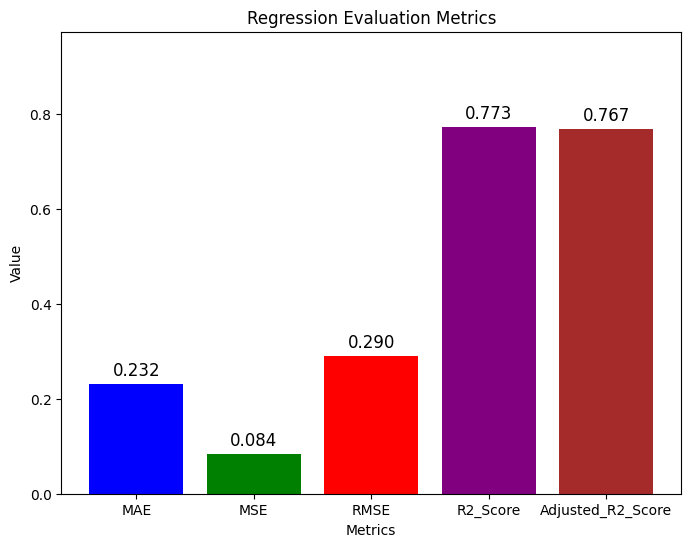

In [50]:
# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple', 'brown'])
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Regression Evaluation Metrics')
plt.ylim(0, max(values) + 0.2)  # Set the y-axis range

for i, val in enumerate(values):
    plt.text(i, val + 0.01, f'{val:.3f}', ha='center', va='bottom', fontsize=12)
